# Long Short Term Memory(LSTM) using Tensorflow

## Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Using MNIST (hand written text) DATASET

In [2]:
mnist = tf.keras.datasets.mnist

Divide Data into test and training data.

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Creating a list of all the classes that a dataset contain.

In [22]:
classes=['ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE','TEN']

Normalizing the image.

In [11]:
x_train=x_train/255
x_test=x_test/255

Setting image size 28x28 because images in data set have this size.

In [6]:
image_size=(28,28)

### LSTM MODEL 

In [7]:
lstm=models.Sequential([
    layers.LSTM(128,input_shape=image_size,activation='relu',return_sequences=True),
    layers.Dropout(0.2),
    
    layers.LSTM(128,activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

Setting adam optimizer with learning rate 1x10^-3.

In [8]:
opt=tf.keras.optimizers.Adam(learning_rate=1e-3,decay=1e-5)

C:\Users\Junaid\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Compiling Model.

In [9]:
lstm.compile(optimizer=opt,
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

#### Training model on training data with 10 epochs.

In [10]:
lstm.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.6670 - accuracy: 0.7812
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1647 - accuracy: 0.9541
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1096 - accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0868 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0713 - accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0561 - accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0504 - accuracy: 0.9872
Epoch 8/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0458 - accuracy: 0.9878
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0351 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 70s 37m

Loss and accuracy of the model at the en of 10 epochs.

In [12]:
loss,accuracy=lstm.evaluate(x_test,y_test)
print("LOSS OF THE MODEL IS {}".format(loss))
print("ACCURACY OF THE MODEL IS {}%".format(accuracy*100))

313/313 [==============================] - 4s 13ms/step - loss: 0.0448 - accuracy: 0.9881
LOSS OF THE MODEL IS 0.044842083007097244
ACCURACY OF THE MODEL IS 98.8099992275238%


This method is for displaying Image.


In [13]:
def display_image(image,label):
    plt.figure(figsize = (15,2))
    plt.imshow(input_data[image])
    plt.xlabel(classes[label])

##### Taking first  20 images from test data to check output.

In [20]:
input_data=x_test[:20]
input_labels=y_test[:20]
input_labels=input_labels.reshape(-1,)

In [18]:
output=lstm.predict(input_data)
predicted_classes=[np.argmax(i) for i in output]

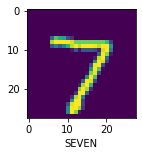

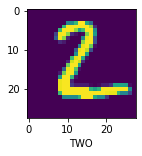

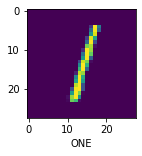

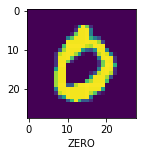

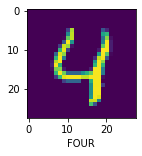

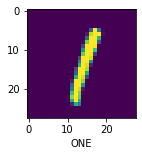

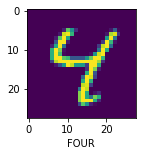

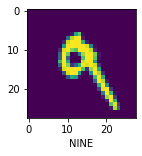

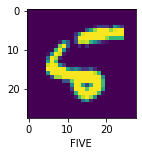

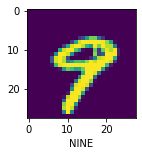

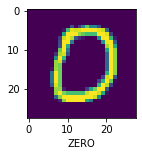

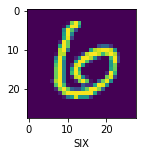

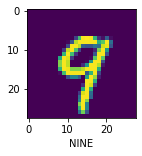

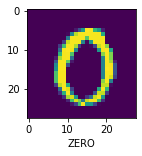

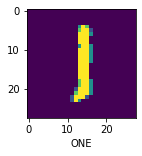

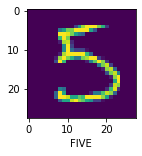

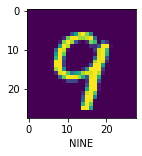

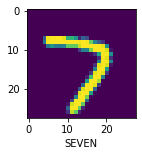

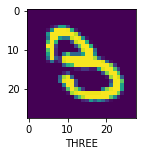

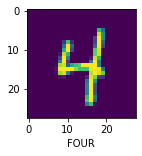

In [23]:
for i in range(len(input_data)):
    display_image(i,predicted_classes[i])